In [162]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sklearn.metrics

In [201]:
train_df = pd.read_csv('train_clean.csv')
test_df = pd.read_csv('test_clean.csv')
combine = [train_df, test_df]

XX = train_df.drop('Survived', axis=1)
yy = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.4)


X_to_sub = test_df.drop('PassengerId', axis=1).copy()


In [93]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_to_sub)
acc_log = logreg.score(X_test, y_test)

In [94]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_to_sub)
acc_svc = svc.score(X_test, y_test)

In [95]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_to_sub)
acc_knn = knn.score(X_test, y_test)

In [224]:
rf = RandomForestClassifier()
distrib = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
          'max_features': ['auto', 'sqrt'],
          'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'bootstrap': [True, False]}

model = RandomizedSearchCV(rf, distrib)
search = model.fit(XX, yy)

In [225]:
print(search.best_params_)
print('\n')
print(search.best_score_)

{'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}


0.823821480133074


In [217]:
# best: 0.8547486033519553
scores_rf = []
scores_mean = []

In [226]:
# Random Forest
for i in range(10):
    random_forest = RandomForestClassifier(**search.best_params_)
    random_forest.fit(X_train, y_train)
    Y_pred = random_forest.predict(X_to_sub)
    acc_rf = random_forest.score(X_test, y_test)

    scores_rf.append(acc_rf)

In [231]:
random_forest = RandomForestClassifier(**search.best_params_)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_to_sub)
acc_rf = random_forest.score(X_test, y_test)

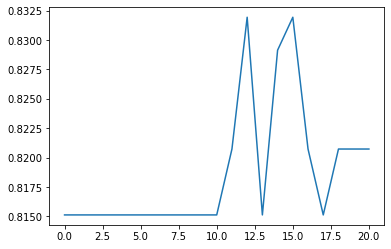

0.8187274909963987


In [227]:
plt.plot(scores_rf)
plt.show()
print(np.mean(scores_rf))
scores_mean.append(np.mean(scores_rf))

In [228]:
print(scores_mean)

[0.8151260504201681, 0.8151260504201681, 0.8187274909963987]


In [125]:
xgb = XGBClassifier()
distrib = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
          'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000],
          'min_child_weight': [0.1, 0.5, 1, 2],
          'gamma': [0, 0.01, 0.02, 0.03]}

model = RandomizedSearchCV(xgb, distrib)
search = model.fit(XX, yy)

In [126]:
print(search.best_params_)
print('\n')
print(search.best_score_)

{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}


0.8226916075575922


In [129]:
xgb = XGBClassifier(n_estimators=1000, max_depth=5,
                    learning_rate=0.1, min_child_weight=0.1,
                   gamma=0.03)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_to_sub)
acc_xgb = xgb.score(X_test, y_test)
acc_t_xgb = xgb.score(X_train, y_train)
print(acc_xgb)


0.8491620111731844


In [ ]:
# best 0.8491620111731844

In [229]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'XGB', 'SVC', 'LogReg'],
    'Score': [acc_rf, acc_knn, acc_xgb, acc_svc, acc_log]
})

models.sort_values(by='Score', ascending=False, inplace=True)
print(models)

           Model     Score
2            XGB  0.849162
0  Random Forest  0.820728
1            KNN  0.804469
4         LogReg  0.804469
3            SVC  0.793296


In [233]:
'''
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf
    })
submission.to_csv('submission_rf1.csv', index=False)
'''